# UK Property Price Trends

### Table of Contents : 

1. Part 1: Dataset

2. Part 2: Requirements
    - 2.1: Prices Changes 
    - 2.2: Statistical Analysis
    - 2.3: Discussion of Findings



## Part 1: Dataset 

### **1.1 Property Price Data** 
The file `average-property-price.csv` has information about th average price of flat (also called apartments) over 36 months in different areas of the country. The dataset contains the following fields:

| Name         | Description                                                                                       |
|--------------|---------------------------------------------------------------------------------------------------|
| Date         | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total. |
| Area         | The name of a local government area                                                               |
| Code         | The code of the area                                                                              |
| RegionName   | The name of the region of which this area is part                                                 |
| RegionCode   | The code of the region                                                                            |
| Price        | Average sale price of a flat (an apartment) property in this area in the month                    |

### **1.2 Understanding the Region / Areas**

The Area Codes are defined by the Office for National Statistics (ONS) and reflect the hierarchy of government in the UK. We have simplified the data, so it is not necessary to understand the full ONS codes. However, for more information, you can read about it [here](https://en.wikipedia.org/wiki/ONS_coding_system).

In the provided data, each price is labeled with:
- **A local government area**: There are 4 different types of local government areas, although the distinction is not important in our analysis. Each area belongs to one of the regions.
- **The region to which the area belongs**: There are 9 regions in England (examples include ‘London’, ‘South East’, and ‘South West’).

The following table shows the prefixes of the different types of area code


| Code Prefix | Type of Area             |
|-------------|---------------------------|
| E10         | County                    |
| E09         | London Borough            |
| E08         | Metropolitan Boroughs      |
| E06         | English unitary authority  |



The regiosn are shown in the table below.

| Region Code | Region Name                |
|-------------|-----------------------------|
| E12000001   | North East                  |
| E12000002   | North West                  |
| E12000003   | Yorkshire and The Humber    |
| E12000004   | East Midlands               |
| E12000005   | West Midlands               |
| E12000006   | East of England             |
| E12000007   | London                      |
| E12000008   | South East                  |
| E12000009   | South West                  |



## Part 2: Requirements
This task is divided into three main parts: 
- 2.1: Calculating and displaying price changes
- 2.2: Performing statistical analysis
- 2.3: Discussing the findings

### 2.1 Calculate and Display Price Changes

#### **2.1.1 Prices Changes between July 2017 and July 2018**
- The change in the price of flats in each area between July 2017 and July 2018 is calculated.
- These prices changes is then converted into percentage change to facilitate easier comparision and visualisation, which is detailed in section 2.1.2.

In [2]:
import pandas as pd
prices = pd.read_csv('average_flat_prices.csv')

#2017 df
july_2017 = prices[prices['Month'] == '2017-07-01']
july_2017 = july_2017.rename(columns={'Price': 'Price_17'})
print('The flat prices based on areas in 2017 were:')
display(july_2017[['Area','Price_17','Month']].head())


#2018 df
july_2018 = prices[prices['Month'] == '2018-07-01']
july_2018 = july_2018.rename(columns={'Price': 'Price_18'})
print('\n The flat prices based on area in 2018 were:')
display(july_2018[['Area','Price_18','Month']].head())

The flat prices based on areas in 2017 were:


,Area,Price_17,Month
10,Hartlepool,65007.84170,2017-07-01
46,Middlesbrough,69163.06963,2017-07-01
82,Redcar and Cleveland,65507.80990,2017-07-01
118,Stockton-on-Tees,83599.32806,2017-07-01
154,Darlington,87041.37973,2017-07-01



 The flat prices based on area in 2018 were:


,Area,Price_18,Month
22,Hartlepool,61116.82158,2018-07-01
58,Middlesbrough,69313.90788,2018-07-01
94,Redcar and Cleveland,64802.79724,2018-07-01
130,Stockton-on-Tees,83654.55272,2018-07-01
166,Darlington,83679.31818,2018-07-01


In [3]:
#Prices Changes 
price_diff = pd.merge(july_2017, july_2018, on=['Area', 'Code', 'RegionName', 'RegionCode'])
price_diff = price_diff.drop(columns=['Month_x', 'Month_y'])
price_diff['Price_Change'] = price_diff['Price_18'] - price_diff['Price_17']

# Percentage change 
price_diff['Percentage_Change'] = ((price_diff['Price_18'] - price_diff['Price_17']) / price_diff['Price_17']) * 100
display(price_diff[['Area','Price_17','Price_18', 'Price_Change', 'Percentage_Change']].head())

,Area,Price_17,Price_18,Price_Change,Percentage_Change
0,Hartlepool,65007.84170,61116.82158,-3891.02012,-5.985463
1,Middlesbrough,69163.06963,69313.90788,150.83825,0.218091
2,Redcar and Cleveland,65507.80990,64802.79724,-705.01266,-1.076227
3,Stockton-on-Tees,83599.32806,83654.55272,55.22466,0.066059
4,Darlington,87041.37973,83679.31818,-3362.06155,-3.862601


#### **2.1.2 Data Visualisation (Changes of Area Prices by Region)**
- The scatter plot shows the percentage change in flat prices by area and region between July 2017 and July 2018, plotted against the price level in July 2017.
- The bar chart provides additional insights on the price changes at a more localised, area-specific level within each region. 

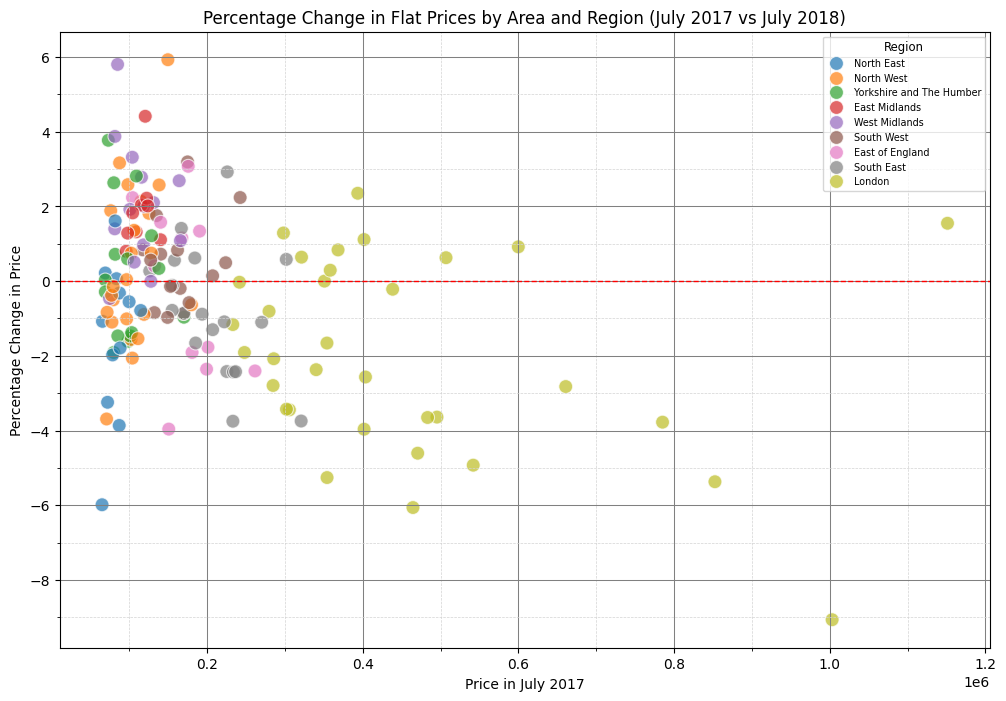

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(12, 8))

sns.scatterplot(data=price_diff, x='Price_17', y='Percentage_Change', hue='RegionName', palette='tab10', alpha=0.7, s=100)                 

plt.title('Percentage Change in Flat Prices by Area and Region (July 2017 vs July 2018)')
plt.xlabel('Price in July 2017')
plt.ylabel('Percentage Change in Price')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend(title='Region', fontsize='x-small', title_fontsize='small', loc='upper right')


#Gridlines 
plt.gca().xaxis.set_minor_locator(MultipleLocator(100000))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.75)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.show()

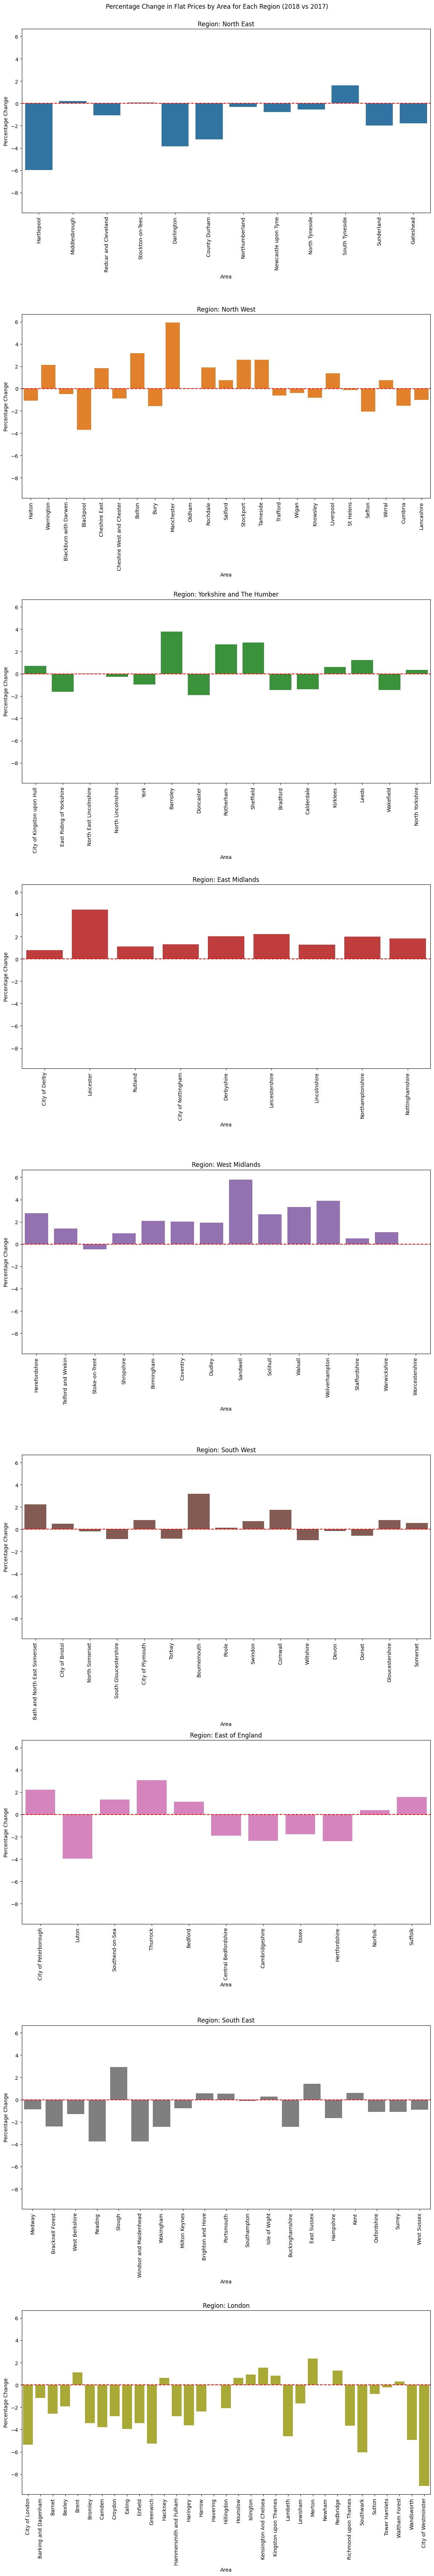

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

regions = price_diff['RegionName'].unique()
num_regions = len(regions)
region_palette = sns.color_palette('tab10')  

# Subplots for each region
fig, axes = plt.subplots(num_regions, 1, figsize=(12, 8 * num_regions), sharey=True)
fig.suptitle('Percentage Change in Flat Prices by Area for Each Region (2018 vs 2017)')

for i, region in enumerate(regions):
    region_data = price_diff[price_diff['RegionName'] == region]

    sns.barplot(x='Area', y='Percentage_Change', data=region_data, ax=axes[i], color=region_palette[i])
    axes[i].set_title(f'Region: {region}')
    axes[i].set_ylabel('Percentage Change')
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].tick_params(axis='x', rotation=90)  

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


#### **2.1.3 Data Analysis**
This section introduces the analysis of scatter plot and bar chart from Section 2.1.2, which illustrate the percentage change in flat prices across areas and regions between July 2017 and July 2018. 

In the scatter plot of the percentage change in flat prices by area and region from July 2017 to July 2018, we observe the following patterns: 

**General Observations**

The flat prices across all regions and areas in 2017 range from approximately £6000 to £1.15 million, indicating a wide variations in price levels and trends across different regions and areas. Across all regions, there is a relatively balanced mix of areas with increasing and decreasing prices. However, London stands out as an exception, with most areas experiencing price decreases.

- **London:**
    London (yellow-green) has the most expensive housing prices, ranging between £230,000 to £1.15 million in 2017. Although London has the highest flat prices, most of the areas experiencing price declines. London also has the largest price drop, where an area in London showing price decreases of over 8% within a year. 

- **Moderately Expensive Regions:**
    The South East (grey), East of England (pink) and South West (brown) show moderately high prices, in the range of £150,000 to £300,000. These regions show a mix of both price increases and decreases, though the changes are relatively small compared to London, with most fluctuations falling withing ±2-4%.

- **Lower Priced Regions:**
    Most of the remaining regions are concentrated on the left side of the plot, with flat prices below £200,000 in 2017. These regions also show more wider distribution of positive and negative price changes compared to the moderately expensive regions, mostly within ±0-6% over the year. The largest increases in this group are observed in the West Midlands (purple) and North West (orange), where individual areas experienced price increases of up to +6%, while the largest decreases in this group is in North East (blue), showed a decreases up to 6%. 

The bar chart provides additional insights on the price changes at a more granular, local area level:

1. **North East (Blue)**: Majority of the areas experienced a decrease in prices over the year. The only area with a price increase was *South Tyneside*, which saw a modest increase of about 2%. In contrast, *Hartlepool* had the highest percentage decrease, around -6%.

2. **North West (Orange)**: This region shows a relatively equal distribution of areas with positive and negative changes, indicating a balanced market price generally within ±2% to 4%. However, *Manchester* had the highest increase at 6%, with a starting price of £150,000 in 2017, while *Blackpool* had the highest decrease, at -4%. 

3. **Yorkshire and the Humber (Green)**: Similar to the North West, Yorkshire and the Humber showed a fairly spread of both increases and decreases in flat prices across a year. Negative changes were generally within -2%, while positive changes were within 4%. The highest positive change was in *Barnsley* (4%), and *North East Lincolnshire* showed no change.

4. **East Midlands (Red)**: The East Midlands shows consistent increases in flat prices across all areas throughout the year, with no negative changes recorded. Among the areas, *Leicester* experienced the highest increase at approximately 4%.

5. **West Midlands (Purple)**: Most areas show an increase in prices, with only one area showing a decrease. *Sandwell* had the highest increase at 6%, with a starting price of about £90,00 in 2017, while *Stoke-on-Trent* was the only area with a decrease, less than -2%, and *Worcestershire* showed no change. 

6. **South West (Brown)**: The flat prices trend in South West have a mix of increases and decreases, with most changes are small and clustering around 0%, indicating stability. *Bournemouth* had the highest increase at 4%, while areas such as *North Somerset, Poole, and Devon* showed very little change (less than ±0.5%).

7. **East of England (Pink)**: The majority of areas in the East of England experienced decreases in prices over the year. *Thurrock* had the highest increase at 4%, while *Luton* experienced the highest decrease, at -4%.

8. **South East (Grey)**: Similar to East of England,  most areas in the South East shows decreasing in prices. *Slough* had the highest increase at 4%, while *Reading* and *Windsor and Maidenhead* each had the highest decrease, both around -4%.

9. **London (Yellow-Green)**: Among the regions, London experienced the most widespread price decreases across areas, with a large range in negative changes, going up to more than -8%. The *City of Westminster* had the highest decrease at more than -8%, starting from around £1 million in 2017.


**Conclusion:**

Regions like North West (orange), Yorkshire and the Humber (green) and South West (brown) show a stable housing market, supported by the relatively balanced distributions of small increases and decreases flat prices. This pattern suggests steady demand for housing in these areas. A notable exception in the North West regions is Manchester, which experienced an increase of 6% in prices. This relatively big increase may be driven by urban development and rising increasing housing demands from international students, given Manchester's reputation as a major educational hub. 

In both East Midlands (red) and West Midlands (purple), flat prices predominantly increased over the year. This suggests strong housing growth driven by favourable economic conditions in both regions. The East Midlands (red) stands out, as it was the only region among the nine with no recorded decreases in flat prices, making it potentially attractive area for investment or population influx. 

In contrast, London (yellow-green), East of England (pink) and South East (grey) regions experienced notable declines in flat prices, with London, the most expensive market, experiencing the largest drop. These trends likely reflect affordability concerns, an oversupply of housing, or shift in population dynamics, pointing to a cooling of the market. 

### 2.2 Statistical Analysis 

This section involves a statistical examination of the relationship between region and price trend (increase or decrease). The analysis includes cross-tabulation and independence testing to determine if regional factors are significantly associated with price changes.

#### **2.2.1 Cross-Tabulation of Price Trends by Region**
- A cross-tabulation is created to show the number of areas in each region where flat prices have either increased or decreased. This provides an overview of price trends across regions, highlighting variations in market behavior by region.

In [6]:
import pandas as pd
import numpy as np

# New column 'Price_Trend' to indicate if the price increased or decreased
price_diff['PriceTrend'] = np.where(price_diff['Price_Change'] > 0, 'Increase', 'Decrease')
display(price_diff.head())

# Cross-tabulation of counts of areas with increases or decreases in each region
region_and_pricetrend = pd.crosstab(price_diff['PriceTrend'], price_diff['RegionName'])
print("Cross-tabulation of Price Increases and Decreases by Region:")
display(region_and_pricetrend)


,Area,Code,Price_17,RegionName,RegionCode,Price_18,Price_Change,Percentage_Change,PriceTrend
0,Hartlepool,E06000001,65007.84170,North East,E12000001,61116.82158,-3891.02012,-5.985463,Decrease
1,Middlesbrough,E06000002,69163.06963,North East,E12000001,69313.90788,150.83825,0.218091,Increase
2,Redcar and Cleveland,E06000003,65507.80990,North East,E12000001,64802.79724,-705.01266,-1.076227,Decrease
3,Stockton-on-Tees,E06000004,83599.32806,North East,E12000001,83654.55272,55.22466,0.066059,Increase
4,Darlington,E06000005,87041.37973,North East,E12000001,83679.31818,-3362.06155,-3.862601,Decrease


Cross-tabulation of Price Increases and Decreases by Region:


RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
PriceTrend,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


#### **2.2.2 Testing Independence of Region and Price Changes**
Two methods are used to test the independence of region and price trend:

- a) Chi-Square Test (G-Test Statistic)
- b) Permutation Test

In both tests, the p-value will be calculated to assess the statistical significance of the association between region and price trend.

In [ ]:
import scipy.stats as stats

# Chi-square
test_stat, p_value, dof, expected = stats.chi2_contingency(region_and_pricetrend, lambda_='log-likelihood')
print('The observed G test statistic is %4.4f' % test_stat)
print('The p-value (chi-squared test) is %4.4f %%' % (100 * p_value))

# Permutation test
np.random.seed(42) #for generating same answer for every execution 
n_permutations = 10000
perm_stats = np.zeros(n_permutations)

for i in range(n_permutations):
    shuffled_trend = price_diff['PriceTrend'].sample(frac=1).values
    perm_table = pd.crosstab(shuffled_trend, price_diff['RegionName'])
    perm_stat, _, _, _ = stats.chi2_contingency(perm_table, lambda_='log-likelihood')
    perm_stats[i] = perm_stat

p_value_permutation = np.mean(perm_stats >= test_stat)
print('The p-value (permutation test) is %4.4f %%' % (100 * p_value_permutation))


The observed G test statistic is 32.1901
The p-value (chi-squared test) is 0.0086 %
The p-value (permutation test) is 0.0200 %


### 2.3 Discussion of Findings 

This section provides a discussion of the statistical tests performed to evaluate the association between region and price trend. The discussion covers  the following: 

**(a) Objective of the Tests**
- A description of what is being tested, focusing on the purpose of the tests.

**(b) Comparison of Chi-Squared Test and Permutation Test**
- A brief comparison of the chi-squared test and the permutation test is provided, highlighting differences in their approaches, assumptions, and applicability for assessing the association between region and price trend.

**(c) Interpretation of Results and Conclusion**
- This section includes an interpretation of the results from both tests, including the calculated p-values. The meaning of the p-values is explained, and conclusions are drawn based on the observed association between region and price trend.

___

**(a) Objective of the Test:**

These tests aim to determine whether there is a statistically significant association between region and price trends (increases/decreases over the year). Under the null hypothesis, we assume that the price changes occur independently of region, suggesting that any observed association is due to random chance. The alternative hypothesis posits that there is a relationship between regions and price changes, indicating that certain regions may exhibit distinct patterns in their price trends. 

**(b) Comparison of Testing Methods:**

**Chi-squared test:** 
- The chi-squared test is a parametric test commonly used to test for the independence between two categorical variables. Here, it assesses whether the observed frequencies of price trends across regions matches what we would expect if there were no relationship between region and price trend.
- This test calculates a G-test statistic (log-likehood ratio) based on the difference between observed and expected counts in a contingency table of price trends by region. 
-The observed G-statistic is then compared against a chi-squared distribution to calculate a p-value. This test is computationally efficient but relies on assumptions about the data distribution, limiting it to categorical data and expected frequencies above a certain threshold.

**Permutation Test:**
- The permutation test is a non-parametric test that assesses the significance of the observed association by randomly shuffling the data to create a null distribution. This involves repeatedly permuting the values of PriceTrend across regions to break any real association with RegionName.
- For each permutation, a new G-statistic is calculated based on the shuffled data, creating a null distribution of G-statistics that represents what we would expect if there were no true association between region and price trend.
- In contrast with chi-squared test, the empirical p-value is calculated as the proportion of permuted G-statistics that are as extreme or more extreme than the observed G-statistic. Permutation test does not rely on theoretical distributions, making it robust to violations of assumptions required by the chi-squared test. Although it is more computationally intensive, the permutation test is flexible and suitable for a wider range of data types and smaller sample sizes.

**(c) Results and Conclusion:**

The observed G-test statistic of 32.1901 is relatively large, indicating a significant deviation between the observed and expected counts in the contingency table of regions and price trends. This high G-test statistic suggests that the actual distribution of price trends across regions does not align with what we would expect if price trends were independent of region.

Both the chi-squared and permutation tests yield very low p-values, well below the conventional significance level of 5%. These p-values represent the probability of observing such strong associations between region and price changes if the null hypothesis of independence were true. 

The chi-squared test p-value (0.0086%) suggests that there is only a 0.0086% probability of observing such a strong association if region and price trends were independent. This low p-value leads us to reject the null hypothesis, concluding that region and price trend are indeed significantly associated.

The permutation test p-value (0.02%) also supports this conclusion. The empirical p-value tells us that only 0.02% of the permuted datasets (under the assumption of independence) produced a G-statistic as large as the observed one. This reinforces the statement that the association between region and price trend is statistically significant.

In conclusion, both tests with large G-test statistics with very low p-values, provide strong evidence to reject the null hypothesis of independence between region and price trend, meaning that the price trends varies significantly across regions, and this variation is far too substantial to be attributed to random chance, indicating a true relationship between regions and price changes patterns.

